# Step 1: Obtaining the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
os.chdir(r'C:\Users\palla\Documents\Skill\ML-Projects\Predicting-Employee-Turnover-Complete-Guide-Analysis-master\Predicting-Employee-Turnover-Complete-Guide-Analysis-master\HR Analytics Employee Turnover')
df=pd.read_csv('HR_comma_sep.csv')

In [2]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Step 2: Cleaning the data

Typically, cleaning the data requires a lot of work and can be a very tedious procedure. This dataset from Kaggle is super clean and contains no missing values. 

In [3]:
# Check if there are any missing values
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [4]:
df.shape

(14999, 10)

In [5]:
# Rename the column names for better readability
df = df.rename(columns = {
    
    'satisfaction_level':'Satisfaction',
    'last_evaluation':'Evaluation',
    'number_project' : 'ProjectCount',
    'average_montly_hours':'AvgMonthlyHours',
    'time_spend_company':'YearsAtCompany',
    'promotion_last_5years':'Promotion',
    'sales':'Department',
    'salary':'Salary',
    'left':'Turnover'
    
})

In [6]:
df.head()

,Satisfaction,Evaluation,ProjectCount,AvgMonthlyHours,YearsAtCompany,Work_accident,Turnover,Promotion,Department,Salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
# Summary Statistics

df.describe()

,Satisfaction,Evaluation,ProjectCount,AvgMonthlyHours,YearsAtCompany,Work_accident,Turnover,Promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# Step 3: Explore the data

# 3a.Statistical Overview

The dataset has:

About 15,000 employee observations and 10 features
The company had a turnover rate of about 23.8%
Mean satisfaction of employees is 0.612

In [8]:
# Shape of the data
df.shape

# The dataset contains 14999 observations and 10 columns

(14999, 10)

In [9]:
# Check the datatype of the columns

df.dtypes

Satisfaction       float64
Evaluation         float64
ProjectCount         int64
AvgMonthlyHours      int64
YearsAtCompany       int64
Work_accident        int64
Turnover             int64
Promotion            int64
Department          object
Salary              object
dtype: object

In [10]:
# Turnover rate

turnover_rate = df.Turnover.value_counts(normalize=True)
turnover_rate

# Looks like 76% of the employees stayed, 24% of the employees left the company

0    0.761917
1    0.238083
Name: Turnover, dtype: float64

In [11]:
turnover_summary = df.groupby('Turnover')
turnover_summary.mean()

,Satisfaction,Evaluation,ProjectCount,AvgMonthlyHours,YearsAtCompany,Work_accident,Promotion
Turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


# 3b. Correlation Matrix and Heatmap

In [12]:
corr = df.corr()
corr

,Satisfaction,Evaluation,ProjectCount,AvgMonthlyHours,YearsAtCompany,Work_accident,Turnover,Promotion
Satisfaction,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
Evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
ProjectCount,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
AvgMonthlyHours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
YearsAtCompany,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
Turnover,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
Promotion,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


Text(0.5, 1, 'Heatmap of the Correlation Matrix')

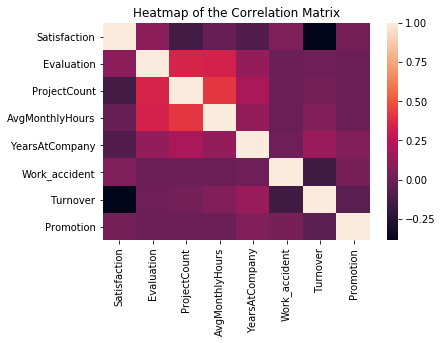

In [13]:
sns.heatmap(corr)
plt.title('Heatmap of the Correlation Matrix')

In [14]:
#3b.1.Statistical test for Correlation

One Sample T-Test

Hypothesis Testing: Chec if there is a significant difference in the mean of satisfaction level between employees who had a turnover and the entire employee population.

Null Hypothesis: There is no difference in satisfaction level between employees who did turnover and the entire employee population.

Alternate Hypothesis: There is a difference in satisfaction level between employees who did turnover and the entire employee population.

In [15]:
# let us compare the mean of employee turnover statisfaction and the mean of employee population satisfaction
emp_population_satisfaction = df['Satisfaction'].mean()
emp_turnover_satisfaction = df[df['Turnover']==1]['Satisfaction'].mean()

print( 'The mean for the employee(entire) population is: ' + str(emp_population_satisfaction) )
print( 'The mean for the employees that had a turnover is: ' + str(emp_turnover_satisfaction) )

The mean for the employee(entire) population is: 0.6128335222348166
The mean for the employees that had a turnover is: 0.44009801176140917


In [16]:
# Conduct T-Test

import scipy.stats as stats

stats.ttest_1samp(a = df[df['Turnover']==1]['Satisfaction'], # Sample of Employee satisfaction who had a Turnover
                  popmean = emp_population_satisfaction)  # Employee Population satisfaction mean

Ttest_1sampResult(statistic=-39.10948894348446, pvalue=9.012781195378076e-279)

In [17]:
degree_freedom = len(df[df['Turnover']==1])

LQ = stats.t.ppf(0.025,degree_freedom)  # Left Quartile

RQ = stats.t.ppf(0.975,degree_freedom)  # Right Quartile

print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))

The t-distribution left quartile range is: -1.9606285215955626
The t-distribution right quartile range is: 1.9606285215955621


T-Test Result

From the above T-Test, we see that the test statistic lies in the rejection region and hence we conclude that the sample data provides enough evidence to support Alternative Hypothesis.

Also, the p-value is very low and is less than 0.05, hence we can reject the Null Hypothesis.

# 3c. Distribution Plots

In [19]:
df.columns

Index(['Satisfaction', 'Evaluation', 'ProjectCount', 'AvgMonthlyHours',
       'YearsAtCompany', 'Work_accident', 'Turnover', 'Promotion',
       'Department', 'Salary'],
      dtype='object')

Text(0.5, 1.0, 'Emploee AvgMonthlyHour Distribution')

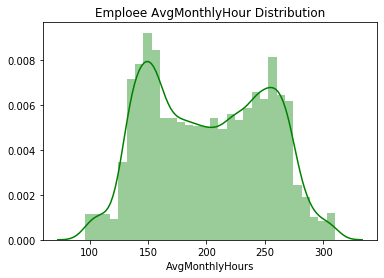

In [20]:
sns.distplot(df.AvgMonthlyHours,color='g').set_title('Emploee AvgMonthlyHour Distribution')

Text(0.5, 1.0, 'Employee Satisfaction Distribution')

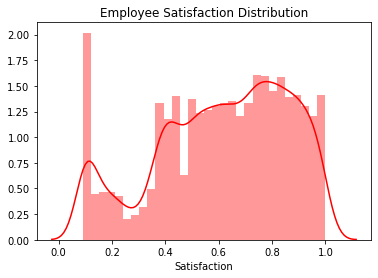

In [21]:
sns.distplot(df.Satisfaction,color ='r').set_title('Employee Satisfaction Distribution')

Text(0.5, 1.0, 'Employee Project Count Distribution')

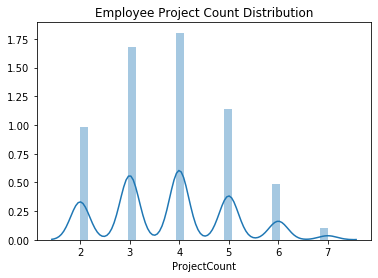

In [22]:
sns.distplot(df.ProjectCount).set_title('Employee Project Count Distribution')

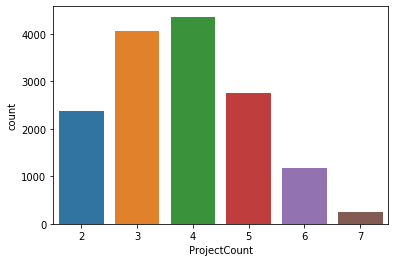

In [23]:
sns.countplot(df.ProjectCount)

Text(0.5, 1.0, 'Employee Evaluation Distribution')

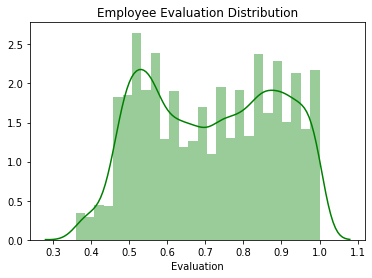

In [24]:
sns.distplot(df.Evaluation,color='g').set_title('Employee Evaluation Distribution')

Text(0.5, 1.0, 'Employee Tenure at Company')

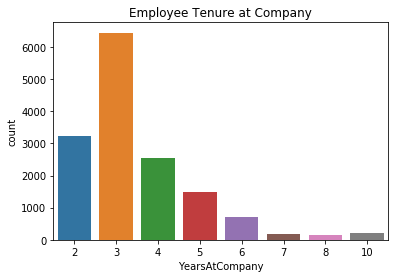

In [25]:
sns.countplot(df.YearsAtCompany).set_title('Employee Tenure at Company')

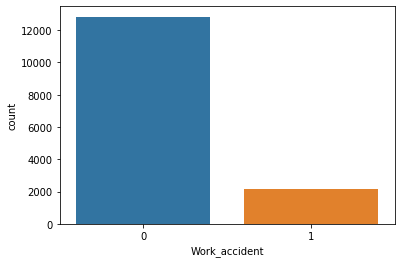

In [26]:
sns.countplot(df.Work_accident)

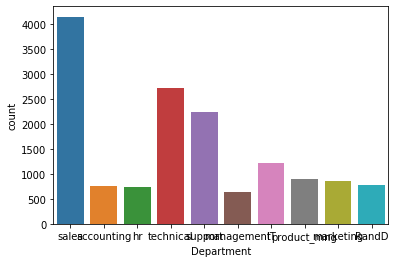

In [27]:
sns.countplot(df.Department)

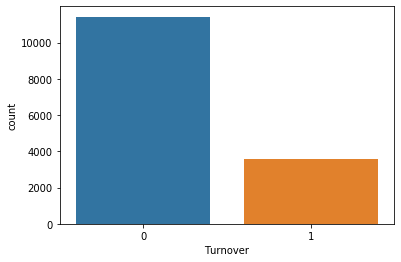

In [28]:
sns.countplot(df.Turnover)

Summary:
1. Average Monthly Hours:  Bimodal distribution of employees with lower and higher average monthly hours (less than 150 hours & more than 250 hours)
2. Satisfcation: There is a huge spike for employees with low satisfaction and high satisfaction. 
3. Evaluation: Bimodal distribution of employees for employees with low evaluations(less than 0.6) and high evaluations(more than 0.8)
4. The highest number of employees in the compnay are from 'Sales' department.
5. The count of employees with tenure of 3 years is higher.
6. The count of employees who faced a work accident is very low.

# Salary vs Turnover 

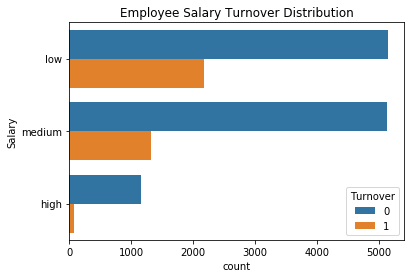

In [30]:
sns.countplot(y="Salary", hue='Turnover', data=df).set_title('Employee Salary Turnover Distribution');

Summary: Employees with low and medium salaries are more likely to leave the company. It is observed that the employees with high salaries are least likely to leave the company.

# Department vs Turnover

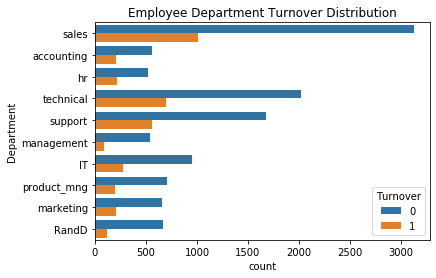

In [31]:
sns.countplot(y="Department", hue='Turnover', data=df).set_title('Employee Department Turnover Distribution');

Summary: The employee turnover is high in the departments Sales, techincal, Support.
         The Management departmnet has the least employee turnover.

# Project Count vs Turnover

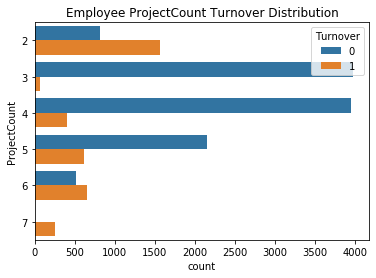

In [32]:
sns.countplot(y="ProjectCount", hue='Turnover', data=df).set_title('Employee ProjectCount Turnover Distribution');

Summary: The employee turonver is high for employees with 2,6 and 7 projects. 
Majority of the employees with 3,4,5 projects did not leave the company.
All the employees with 7 projects left the company.

# Evaluation vs Turnover

Text(0.5, 1.0, 'Employee Evaluation Distribution - Turnover V.S. No Turnover')

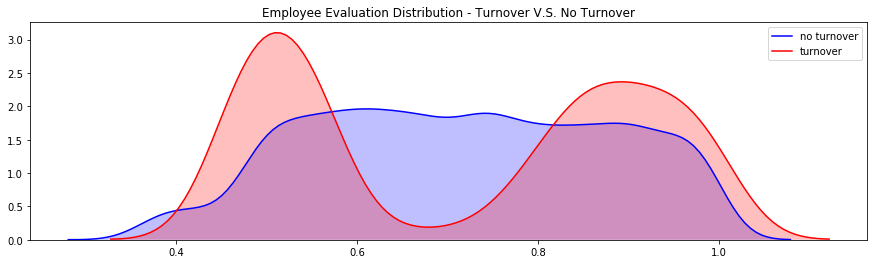

In [33]:
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['Turnover'] == 0),'Evaluation'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['Turnover'] == 1),'Evaluation'] , color='r',shade=True, label='turnover')
plt.title('Employee Evaluation Distribution - Turnover V.S. No Turnover')

Summary: Employees with low and high performance tend to leave the company more. The sweet spot for employees that stayed is within 0.6-0.8 evaluation.

# AvMonthlyHours vs Turnover

Text(0.5, 1.0, 'Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

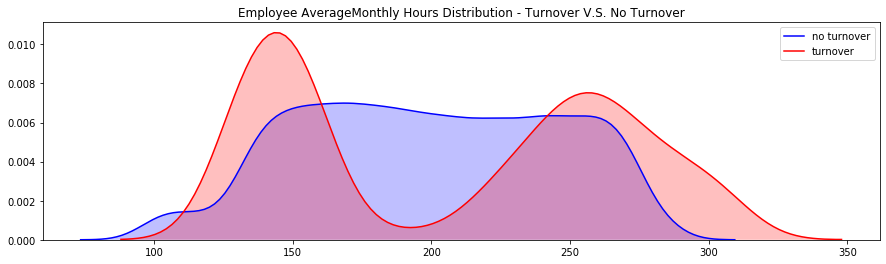

In [34]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Turnover'] == 0),'AvgMonthlyHours'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['Turnover'] == 1),'AvgMonthlyHours'] , color='r',shade=True, label='turnover')
plt.title('Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

Summary: Employees who had less hours of work (~150hours or less) left the company more
Employees who had too many hours of work (~250 or more) left the company
Employees who left generally were underworked or overworked.

# Satisfaction vs Turnover

Text(0.5, 1.0, 'Employee Satisfaction Distribution - Turnover V.S. No Turnover')

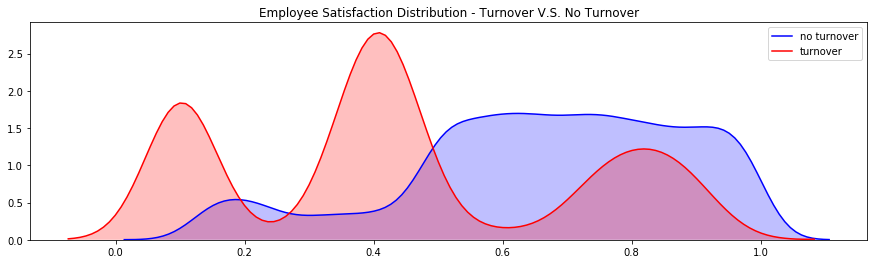

In [35]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Turnover'] == 0),'Satisfaction'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['Turnover'] == 1),'Satisfaction'] , color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')

Summary: Employees who had really low satisfaction levels (0.2 or less) left the company more
Employees who had low satisfaction levels (0.3~0.5) left the company more
Employees who had really high satisfaction levels (0.7 or more) left the company more

# Turnover vs YearsAtCompany

[Text(0, 0.5, 'Percent')]

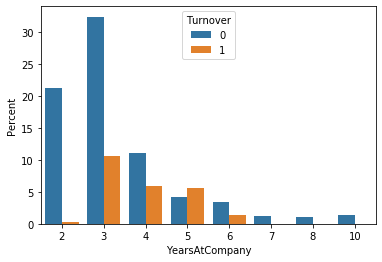

In [36]:
ax = sns.barplot(x="YearsAtCompany", y="YearsAtCompany", hue="Turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

Summary: More than half of the employees with 4 and 5 years left the company.

# Workaccident vs Turnover

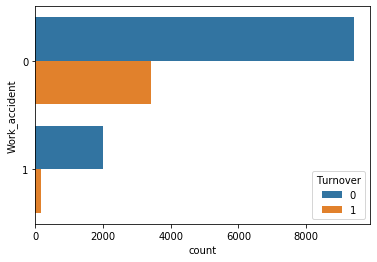

In [37]:
sns.countplot(y = 'Work_accident',hue='Turnover', data=df)

# Promotion vs Turnover

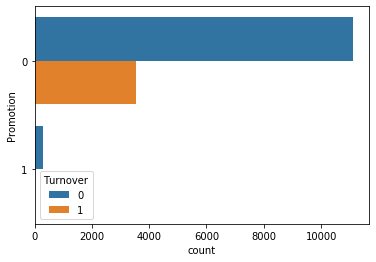

In [38]:
sns.countplot(y = 'Promotion',hue='Turnover', data=df)

Summary: Employees with promotion did not tend to leave the company.

# ProjectCount vs Evaluation

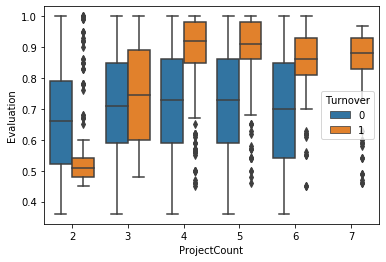

In [39]:
sns.boxplot(x="ProjectCount", y="Evaluation", hue="Turnover", data=df)

Summary: Looks like employees who did not leave the company had an average evaluation of around 70% even with different projectCounts. There is a huge skew in employees who had a turnover though. It drastically changes after 3 projectCounts. 
Employees that had two projects and a horrible evaluation left. Employees with more than 3 projects and super high evaluations left.

# Satisfaction vs Evaluation

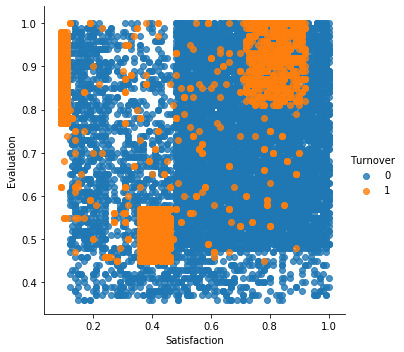

In [40]:
sns.lmplot(x='Satisfaction', y='Evaluation', data=df,
           fit_reg=False, # No regression line
           hue='Turnover')

Summary: There are 3 distinct clusters for employees who left the company
Cluster 1: (Hard-working and Sad Employee)
Satisfaction was below 0.2 and evaluations were greater than 0.75 which could be a good indication that employees who left the company were good workers but felt horrible at their job.

Cluster 2:(Bad and Sad Employee)
Satisfaction between about 0.35~0.45 and evaluations below ~0.58. This could be seen as employees who were badly evaluated and felt bad at work.

Cluster 3: (Hard-working and Happy Employee)
Satisfaction between 0.7~1.0 and evaluations were greater than 0.8 which could mean that employees in this cluster were "ideal". They loved their work and were evaluated highly for their performance.

# ProjectCount vs AvgMonthlyHours

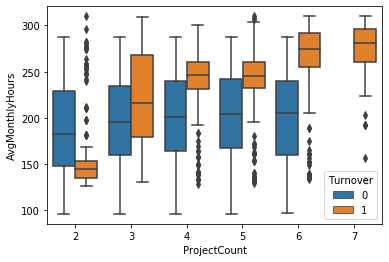

In [41]:
sns.boxplot(x="ProjectCount", y="AvgMonthlyHours", hue="Turnover", data=df)

Summary: Looks like the average employees who stayed worked about 200hours/month. 
Those that had a turnover worked about 250hours/month or 150hours/month

# K-Means clustering of Employee Turnover

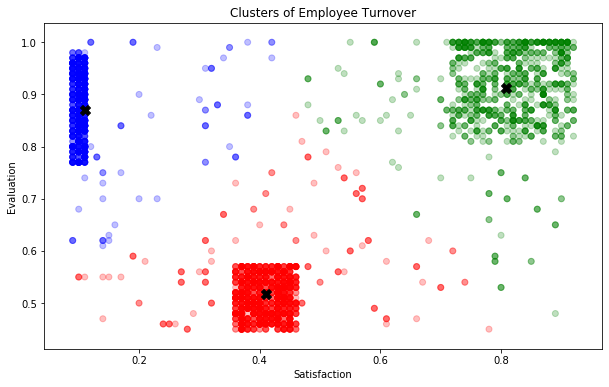

In [42]:
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Employee Turnover
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df.Turnover==1][["Satisfaction","Evaluation"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="Satisfaction",y="Evaluation", data=df[df.Turnover==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

In [43]:
# Create Dummy Variables
department = pd.get_dummies(data = df['Department'],prefix ='Dep')
salary = pd.get_dummies(data = df['Salary'], prefix = 'Sal')
df.drop(['Department','Salary'],axis = 1, inplace = True)
df = pd.concat([df, department, salary],axis = 1)

# 4. Model the data

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score,classification_report, precision_score, recall_score, confusion_matrix,precision_recall_curve
from sklearn.preprocessing import RobustScaler

In [90]:
y = df['Turnover']
X = df.drop('Turnover',axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15 , random_state = 123, stratify = y)

In [91]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty ='l2', C = 1)
model.fit(X_train,y_train)
print("Accuracy",round(accuracy_score(y_test, model.predict(X_test)),2))
print(confusion_matrix(y_test, model.predict(X_test)))

Accuracy 0.79
[[1584  130]
 [ 340  196]]


C:\Users\palla\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [94]:
# Decision Tree Classifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dtree = tree.DecisionTreeClassifier(max_depth=3, min_weight_fraction_leaf=0.01)
dtree = dtree.fit(X_train,y_train)
print ("\n\n ---Decision Tree Model---")
dt_accuracy = accuracy_score(y_test, dtree.predict(X_test))
print("Decision Tree Accuracy =" ,dt_accuracy)
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print ("Decision Tree AUC = %2.2f" % dt_roc_auc)
print(classification_report(y_test, dtree.predict(X_test)))
print(confusion_matrix(y_test, dtree.predict(X_test)))



 ---Decision Tree Model---
Decision Tree Accuracy = 0.944
Decision Tree AUC = 0.93
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1714
           1       0.88      0.89      0.88       536

    accuracy                           0.94      2250
   macro avg       0.92      0.93      0.92      2250
weighted avg       0.94      0.94      0.94      2250

[[1646   68]
 [  58  478]]


In [97]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None, 
    min_samples_split=10, 
    class_weight="balanced"
    )
rf.fit(X_train, y_train)
print ("\n\n ---Random Forest Model---")
print("Accuracy =", accuracy_score(y_test, rf.predict(X_test)))
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))
print(confusion_matrix(y_test, rf.predict(X_test)))



 ---Random Forest Model---
Accuracy = 0.9862222222222222
Random Forest AUC = 0.98
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1714
           1       0.99      0.96      0.97       536

    accuracy                           0.99      2250
   macro avg       0.99      0.98      0.98      2250
weighted avg       0.99      0.99      0.99      2250

[[1707    7]
 [  24  512]]


In [98]:
# Ada Boost Classifier
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=400, learning_rate=0.1)
ada.fit(X_train,y_train)
print ("\n\n ---AdaBoost Model---")
print("Accuracy =", accuracy_score(y_test,ada.predict(X_test)))
ada_roc_auc = roc_auc_score(y_test, ada.predict(X_test))
print ("AdaBoost AUC = %2.2f" % ada_roc_auc)
print(classification_report(y_test, ada.predict(X_test)))
confusion_matrix(y_test, ada.predict(X_test))



 ---AdaBoost Model---
Accuracy = 0.9506666666666667
AdaBoost AUC = 0.93
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1714
           1       0.91      0.88      0.89       536

    accuracy                           0.95      2250
   macro avg       0.94      0.93      0.93      2250
weighted avg       0.95      0.95      0.95      2250



array([[1667,   47],
       [  64,  472]], dtype=int64)

In [103]:
print("-----------Accuracy comparison---------------")
print("Accuracy of Logistic regression model", accuracy_score(y_test,model.predict(X_test)))
print("Accuracy of Decision Tree model", accuracy_score(y_test,dtree.predict(X_test)))
print("Accuracy of Random Forest model", accuracy_score(y_test,rf.predict(X_test)))
print("Accuracy of AdaBoost model", accuracy_score(y_test,ada.predict(X_test)))

-----------Accuracy comparison---------------
Accuracy of Logistic regression model 0.7911111111111111
Accuracy of Decision Tree model 0.944
Accuracy of Random Forest model 0.9862222222222222
Accuracy of AdaBoost model 0.9506666666666667


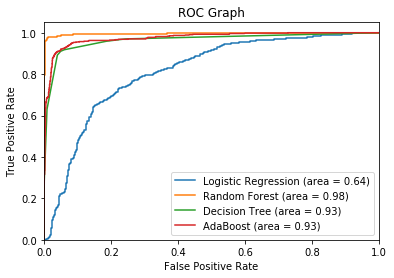

In [105]:
# ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_test, ada.predict_proba(X_test)[:,1])

plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_score(y_test, model.predict(X_test)))

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % roc_auc_score(y_test, rf.predict(X_test)))

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % roc_auc_score(y_test, dtree.predict(X_test)))

# Plot AdaBoost ROC
plt.plot(ada_fpr, ada_tpr, label='AdaBoost (area = %0.2f)' % roc_auc_score(y_test, ada.predict(X_test)))


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

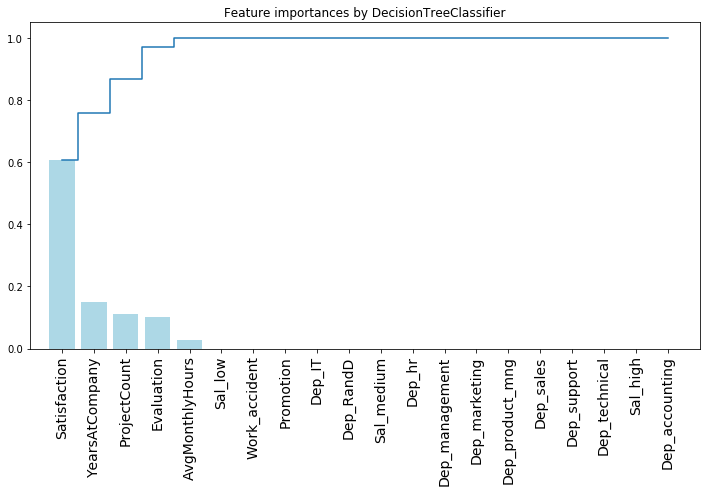

In [113]:
# Feature Importance

plt.rcParams['figure.figsize'] = (12,6)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = df.drop(['Turnover'],axis=1).columns

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

# Interpretation of the Data

Employee satisfaction, yearsAtCompany, and evaluation were the three biggest factors in determining turnover.

1. Employees with low to medium salaries are more likely to leave the company. It is observed that the employees with high salaries are least likely to leave the company.
2. The employee turnover is high in the departments Sales, techincal, Support. The Management departmnet has the least employee turnover.
3. The employee turonver is high for employees with 2,6 and 7 projects. Majority of the employees with 3,4,5 projects did not leave the company. All the employees with 7 projects left the company.
4. Employees with low and high performance tend to leave the company more. The sweet spot for employees that stayed is within 0.6-0.8 evaluation.
5. Employees who had less hours of work (150hours or less) left the company more. Employees who had too many hours of work (250 or more) left the company Employees who left generally were underworked or overworked.
6. Employees who had really low satisfaction levels (0.2 or less) left the company more Employees who had low satisfaction levels (0.3~0.5) left the company more Employees who had really high satisfaction levels (0.7 or more) left the company more.
7. More than half of the employees with 4 and 5 years left the company.
8. Looks like employees who did not leave the company had an average evaluation of around 70% even with different projectCounts. There is a huge skew in employees who had a turnover though. It drastically changes after 3 projectCounts. Employees that had two projects and a horrible evaluation left. Employees with more than 3 projects and super high evaluations left.
